# Exercice sous forme de "projet"

* Objectif : tracer une carte à partir de données un peu complexes

**Consignes**
Vous tracerez une carte à partir de 6 points que vous crééerez. 
Les points devront se situer aux coordonnées géographiques des villes suivantes :      
Londres, Atlanta, Singapour, Vladivostok, Anaheim et Kyoto

Vous ne mettrez pas de fond de carte, mais vous projetterez les contours du monde à l'aide du fichier situé dans `DATA/World_Countries_Boundaries.geojson`


**CONTRAINTES** :    
- Vous projeterez en WSG84
- La couleur des polygones sera `lightgrey`
- La couleur des points sera `green`
- La taille des points sera 500
- Vous enlèverez les axes
- La taille de la figure sera de (50, 30)
- Vous lui donnerez un titre

(Les contraintes sont juste là pour vous faire utiliser des fonctions ou des arguments spécifiques, si vous préférez le faire autrement c'est ok mais rendez la chose un minimum lisible et faites varier les éléments au dessus)

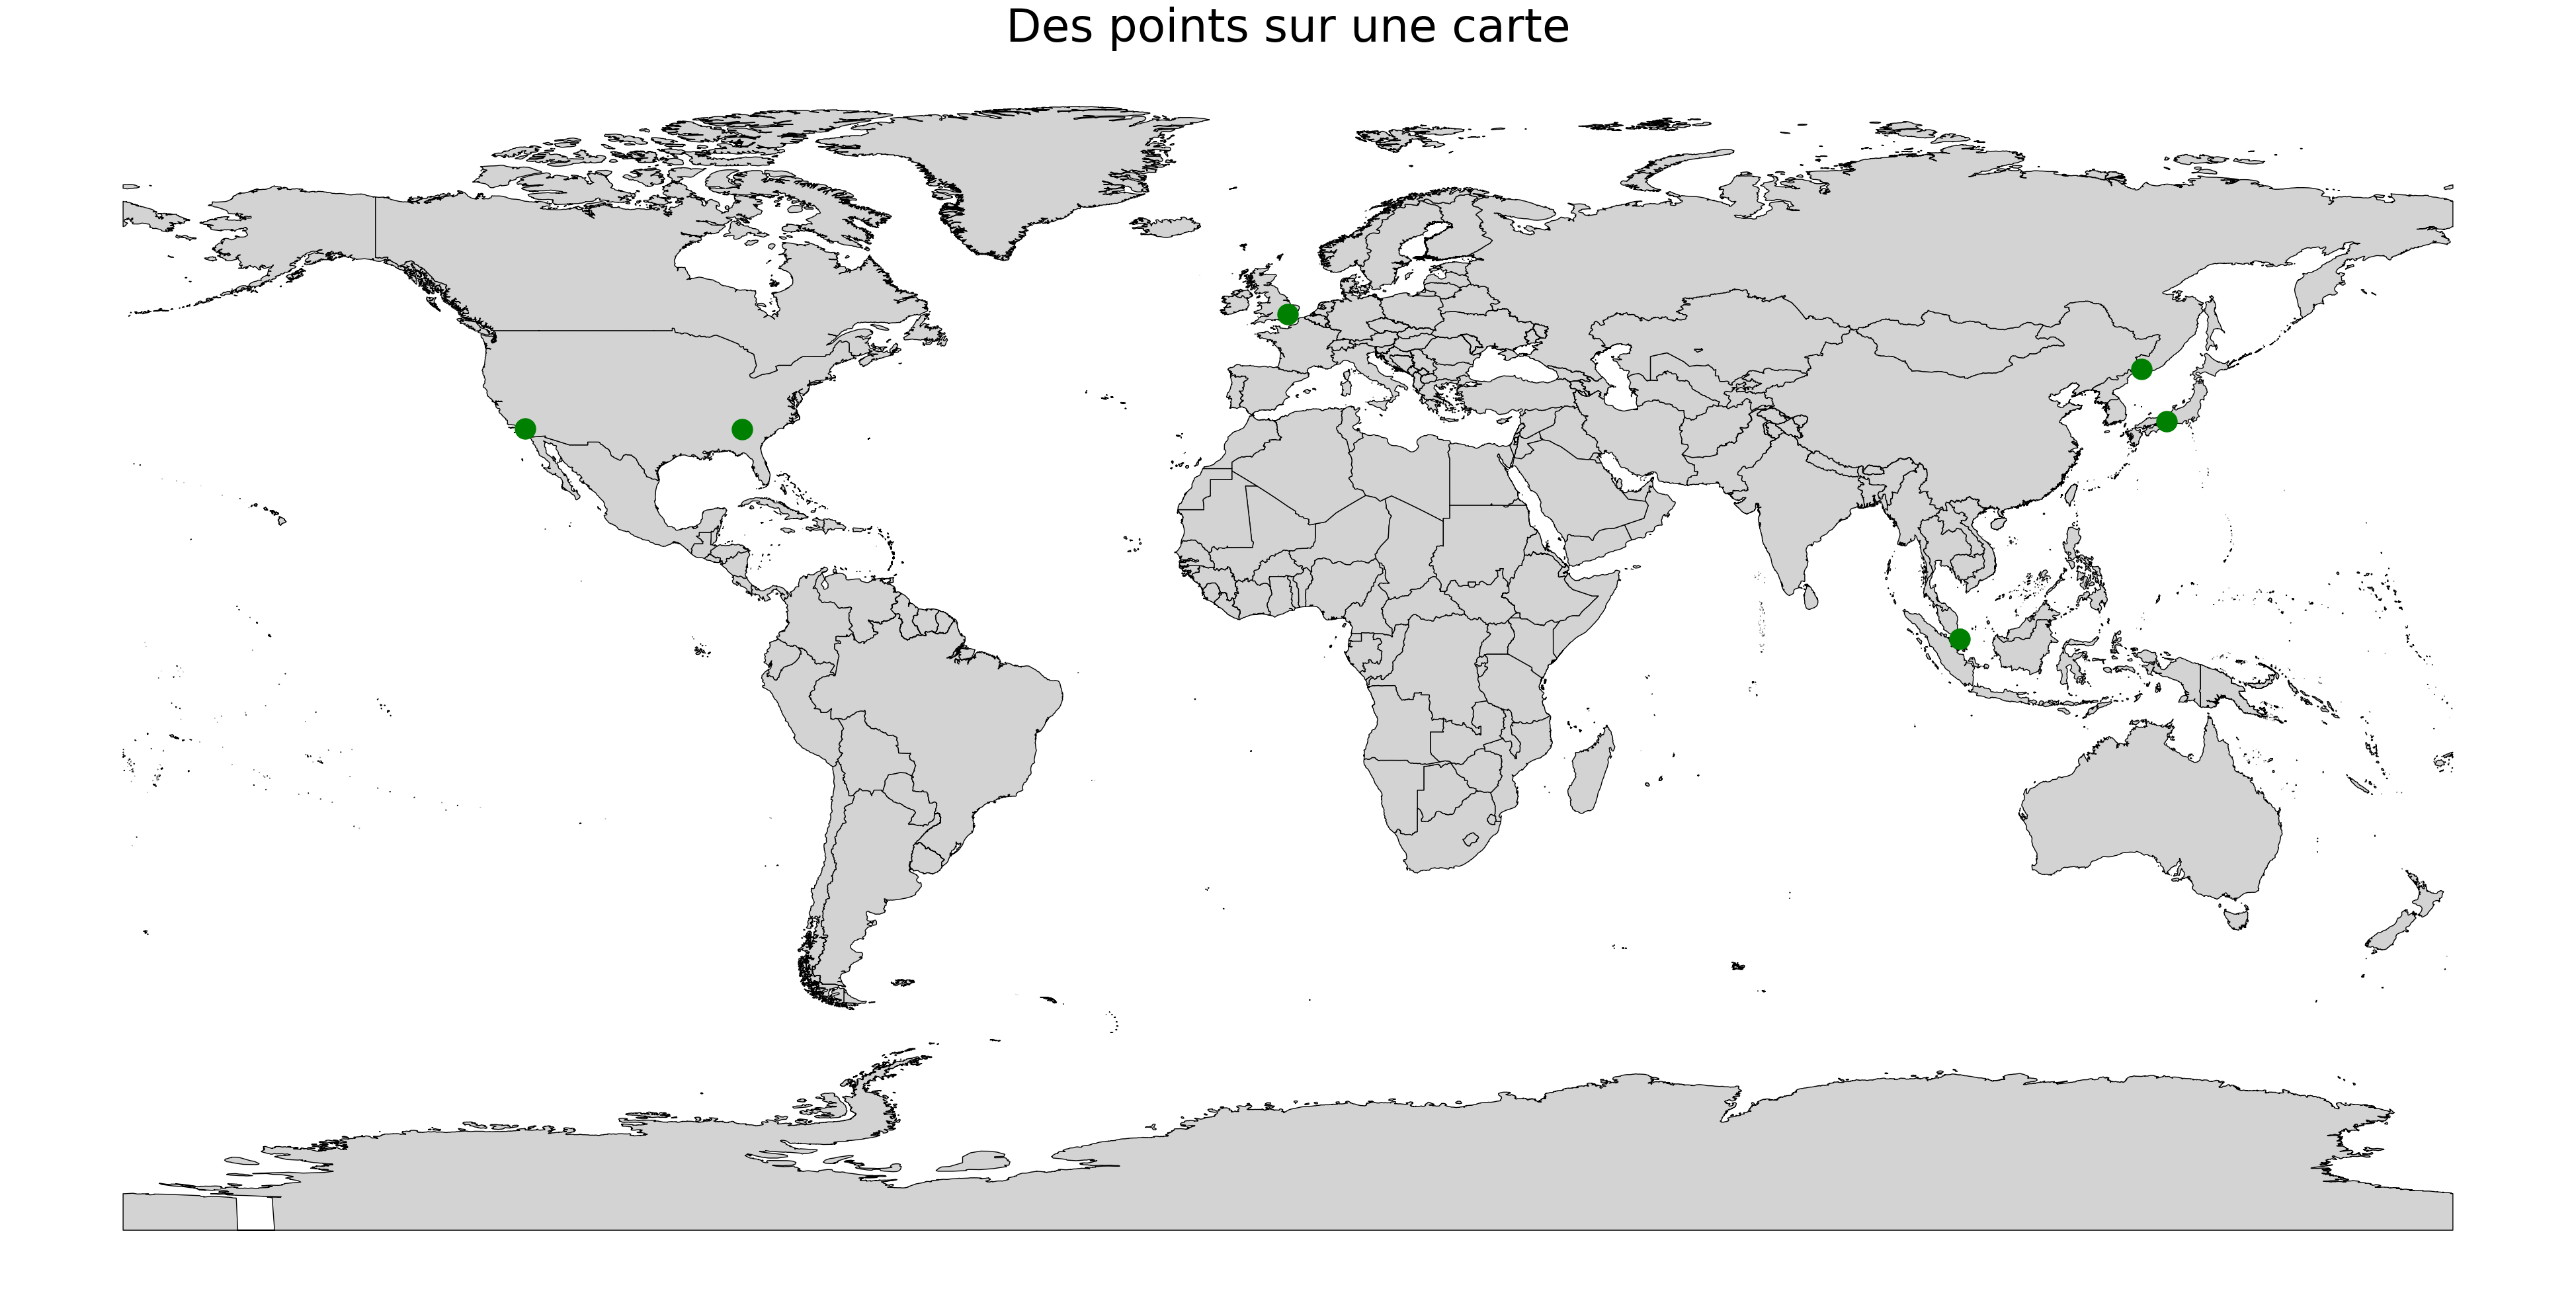

In [20]:
# Corrigé
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

df= pd.DataFrame ({
    "ville":["Londres","Atlanta", "Singapour", "Vladivostok", "Anaheim", "Kyoto"],
    "lat":[51.50784302969281,33.748995,1.364917,43.1056,33.835293,35.011665],
    "lon":[-0.03862630990031146,-84.387982,103.822872,131.8735,-117.914505,135.768326]
})

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["lon"], df["lat"])
)

gdf_world= gpd.read_file("DATA/World_Countries_Boundaries.geojson")


fig, ax = plt.subplots(1, 1, figsize=(50, 30))

gdf_world.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="black"
)

gdf.plot(
    ax=ax,              
    color='green',       
    markersize=500,     
)

ax.axis("off")      
plt.title("Des points sur une carte", fontsize=50)      
plt.show()  

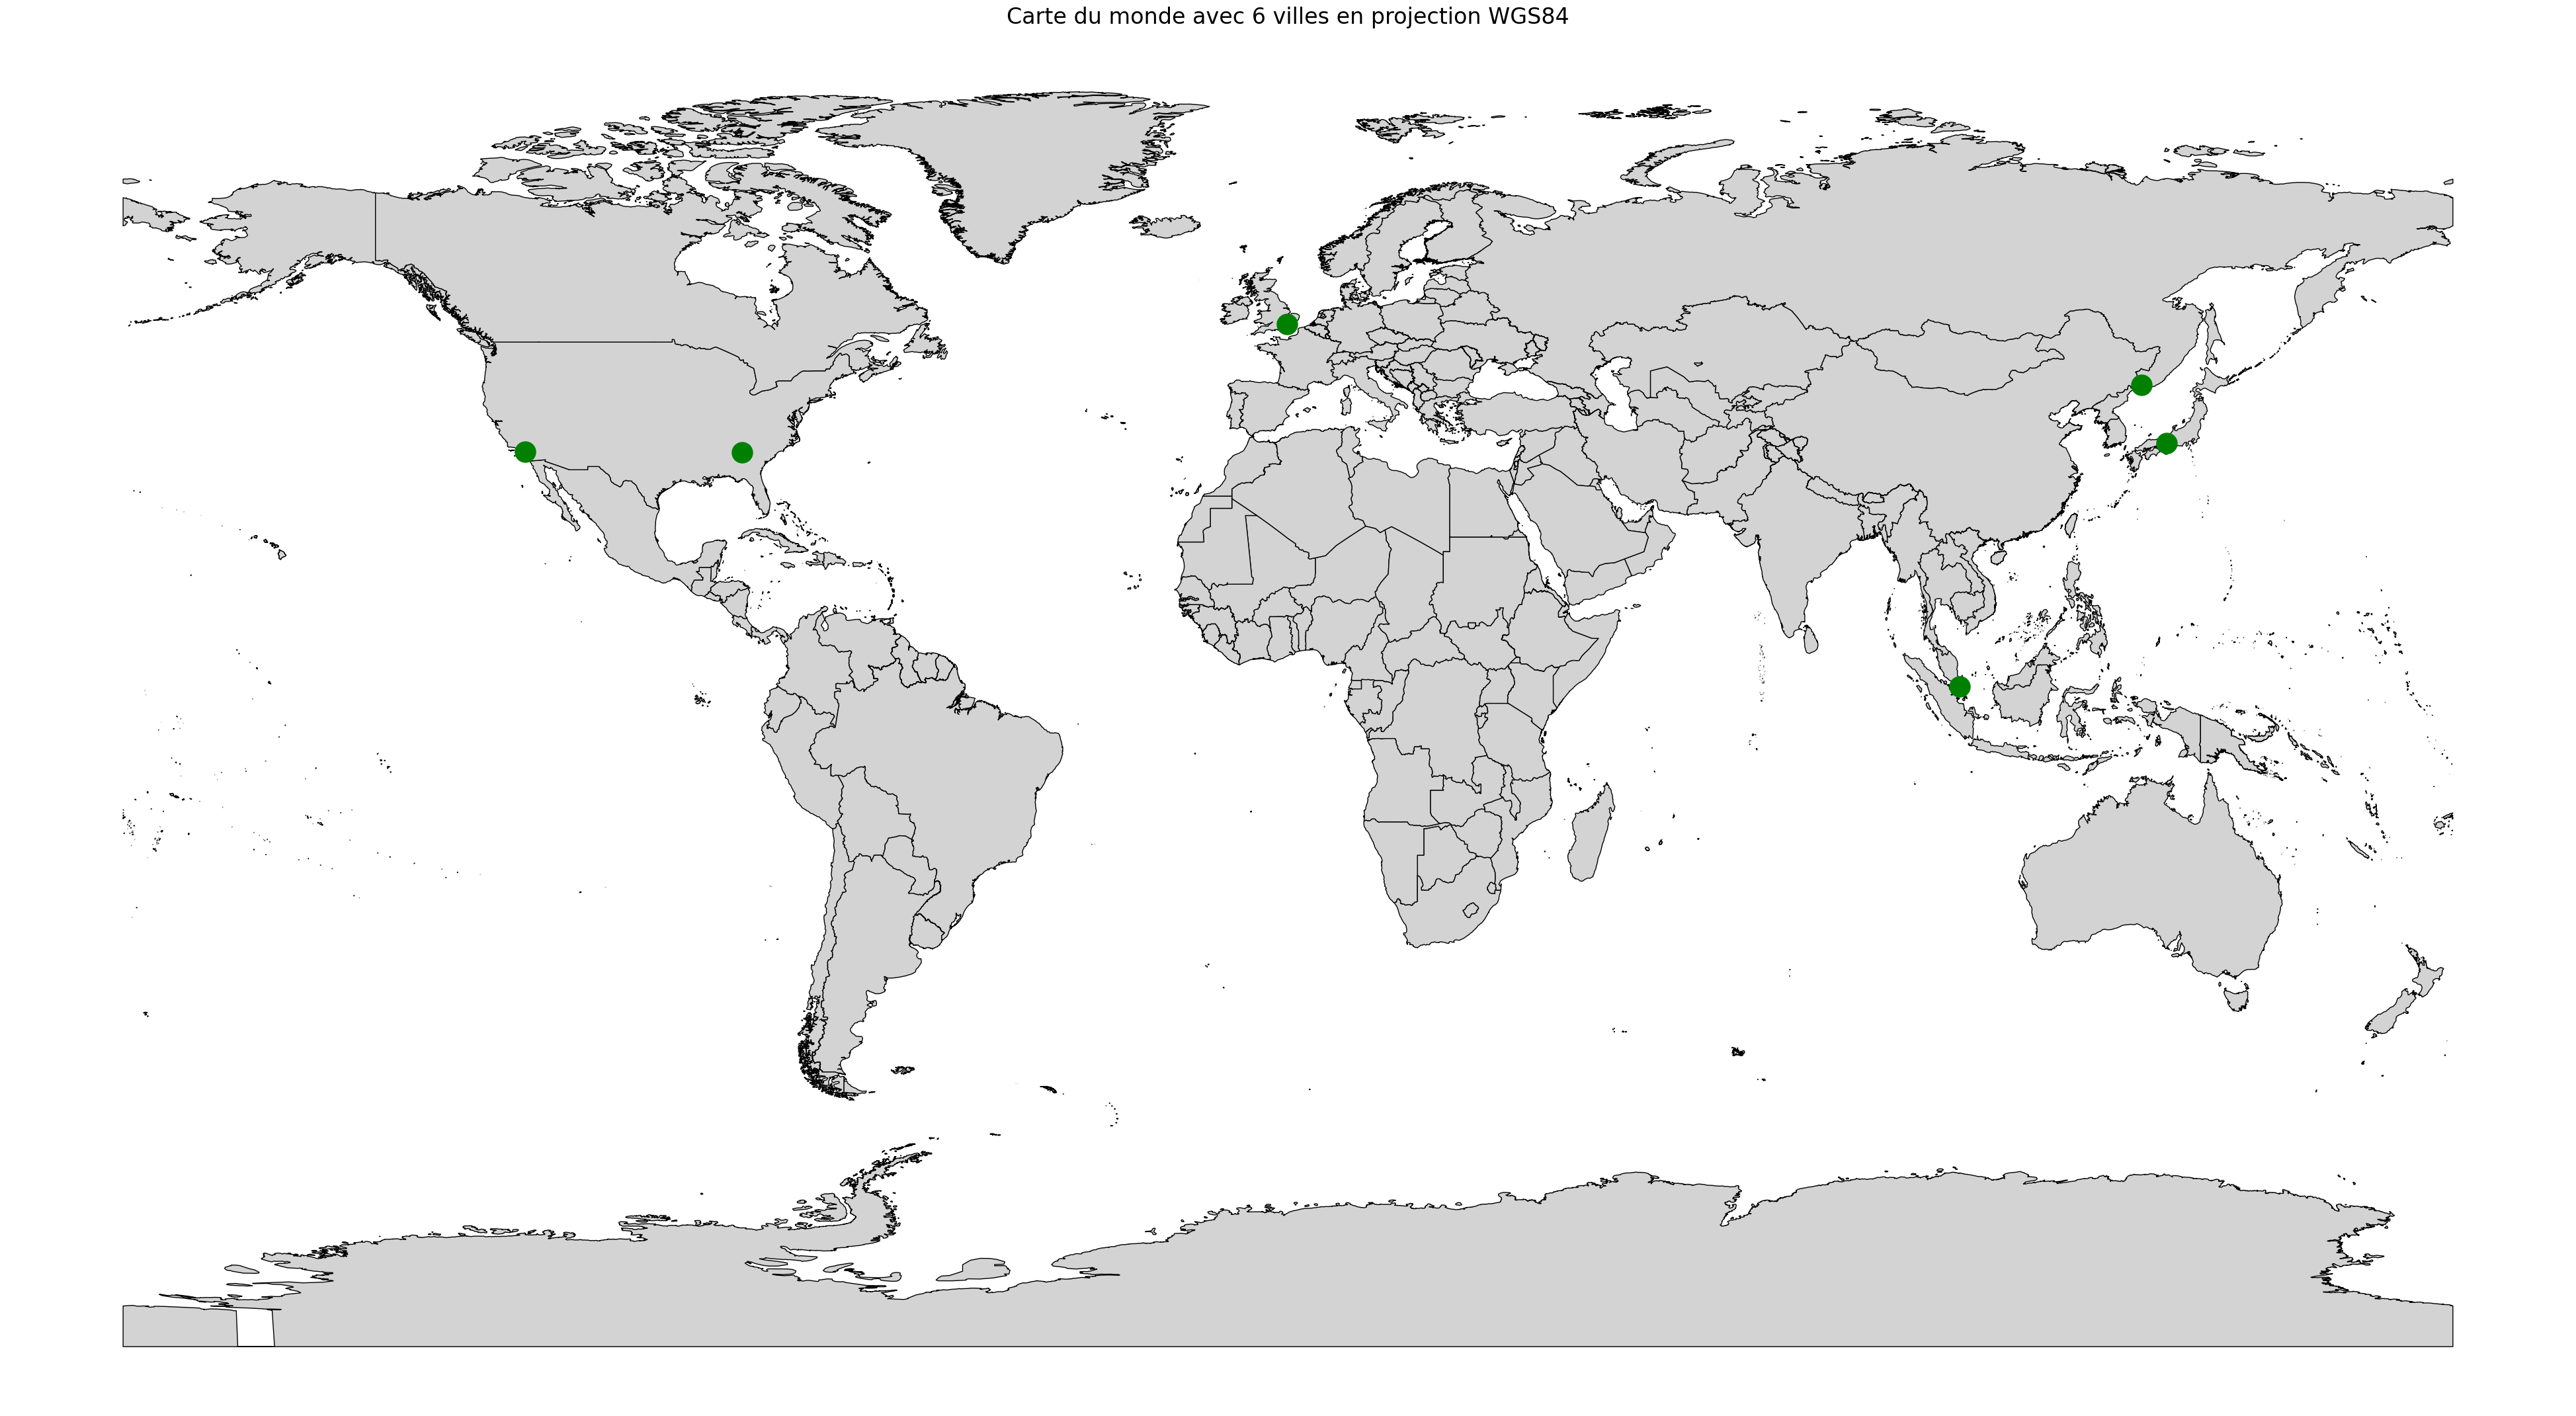

In [21]:
# Version chatgpt : 
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# ----------------------------
# 1. Création des points
# ----------------------------
villes = {
    "Londres": (-0.1278, 51.5074),
    "Atlanta": (-84.3880, 33.7490),
    "Singapour": (103.8198, 1.3521),
    "Vladivostok": (131.8855, 43.1155),
    "Anaheim": (-117.9143, 33.8366),
    "Kyoto": (135.7681, 35.0116)
} # → Vous n'allez pas utiliser des tuples directement vu que c'est déjà compliqué les listes et les dictionnaires

points = [Point(lon, lat) for lon, lat in villes.values()] # → On a pas vu

gdf_points = gpd.GeoDataFrame(
    villes.keys(), 
    geometry=points,
    crs="EPSG:4326"  # WGS84
) # → On a pas vu 

# ----------------------------
# 2. Chargement des contours du monde
# ----------------------------
world = gpd.read_file("DATA/World_Countries_Boundaries.geojson")
world = world.to_crs("EPSG:4326")  # WGS84

# ----------------------------
# 3. Tracé de la carte
# ----------------------------
fig, ax = plt.subplots(figsize=(50, 30))

# Polygones du monde
world.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="black"
)

# Points
gdf_points.plot(
    ax=ax,
    color="green",
    markersize=500
)

# ----------------------------
# 4. Mise en forme
# ----------------------------
ax.set_title(
    "Carte du monde avec 6 villes en projection WGS84",
    fontsize=24
)

ax.axis("off")  # suppression des axes

plt.show()


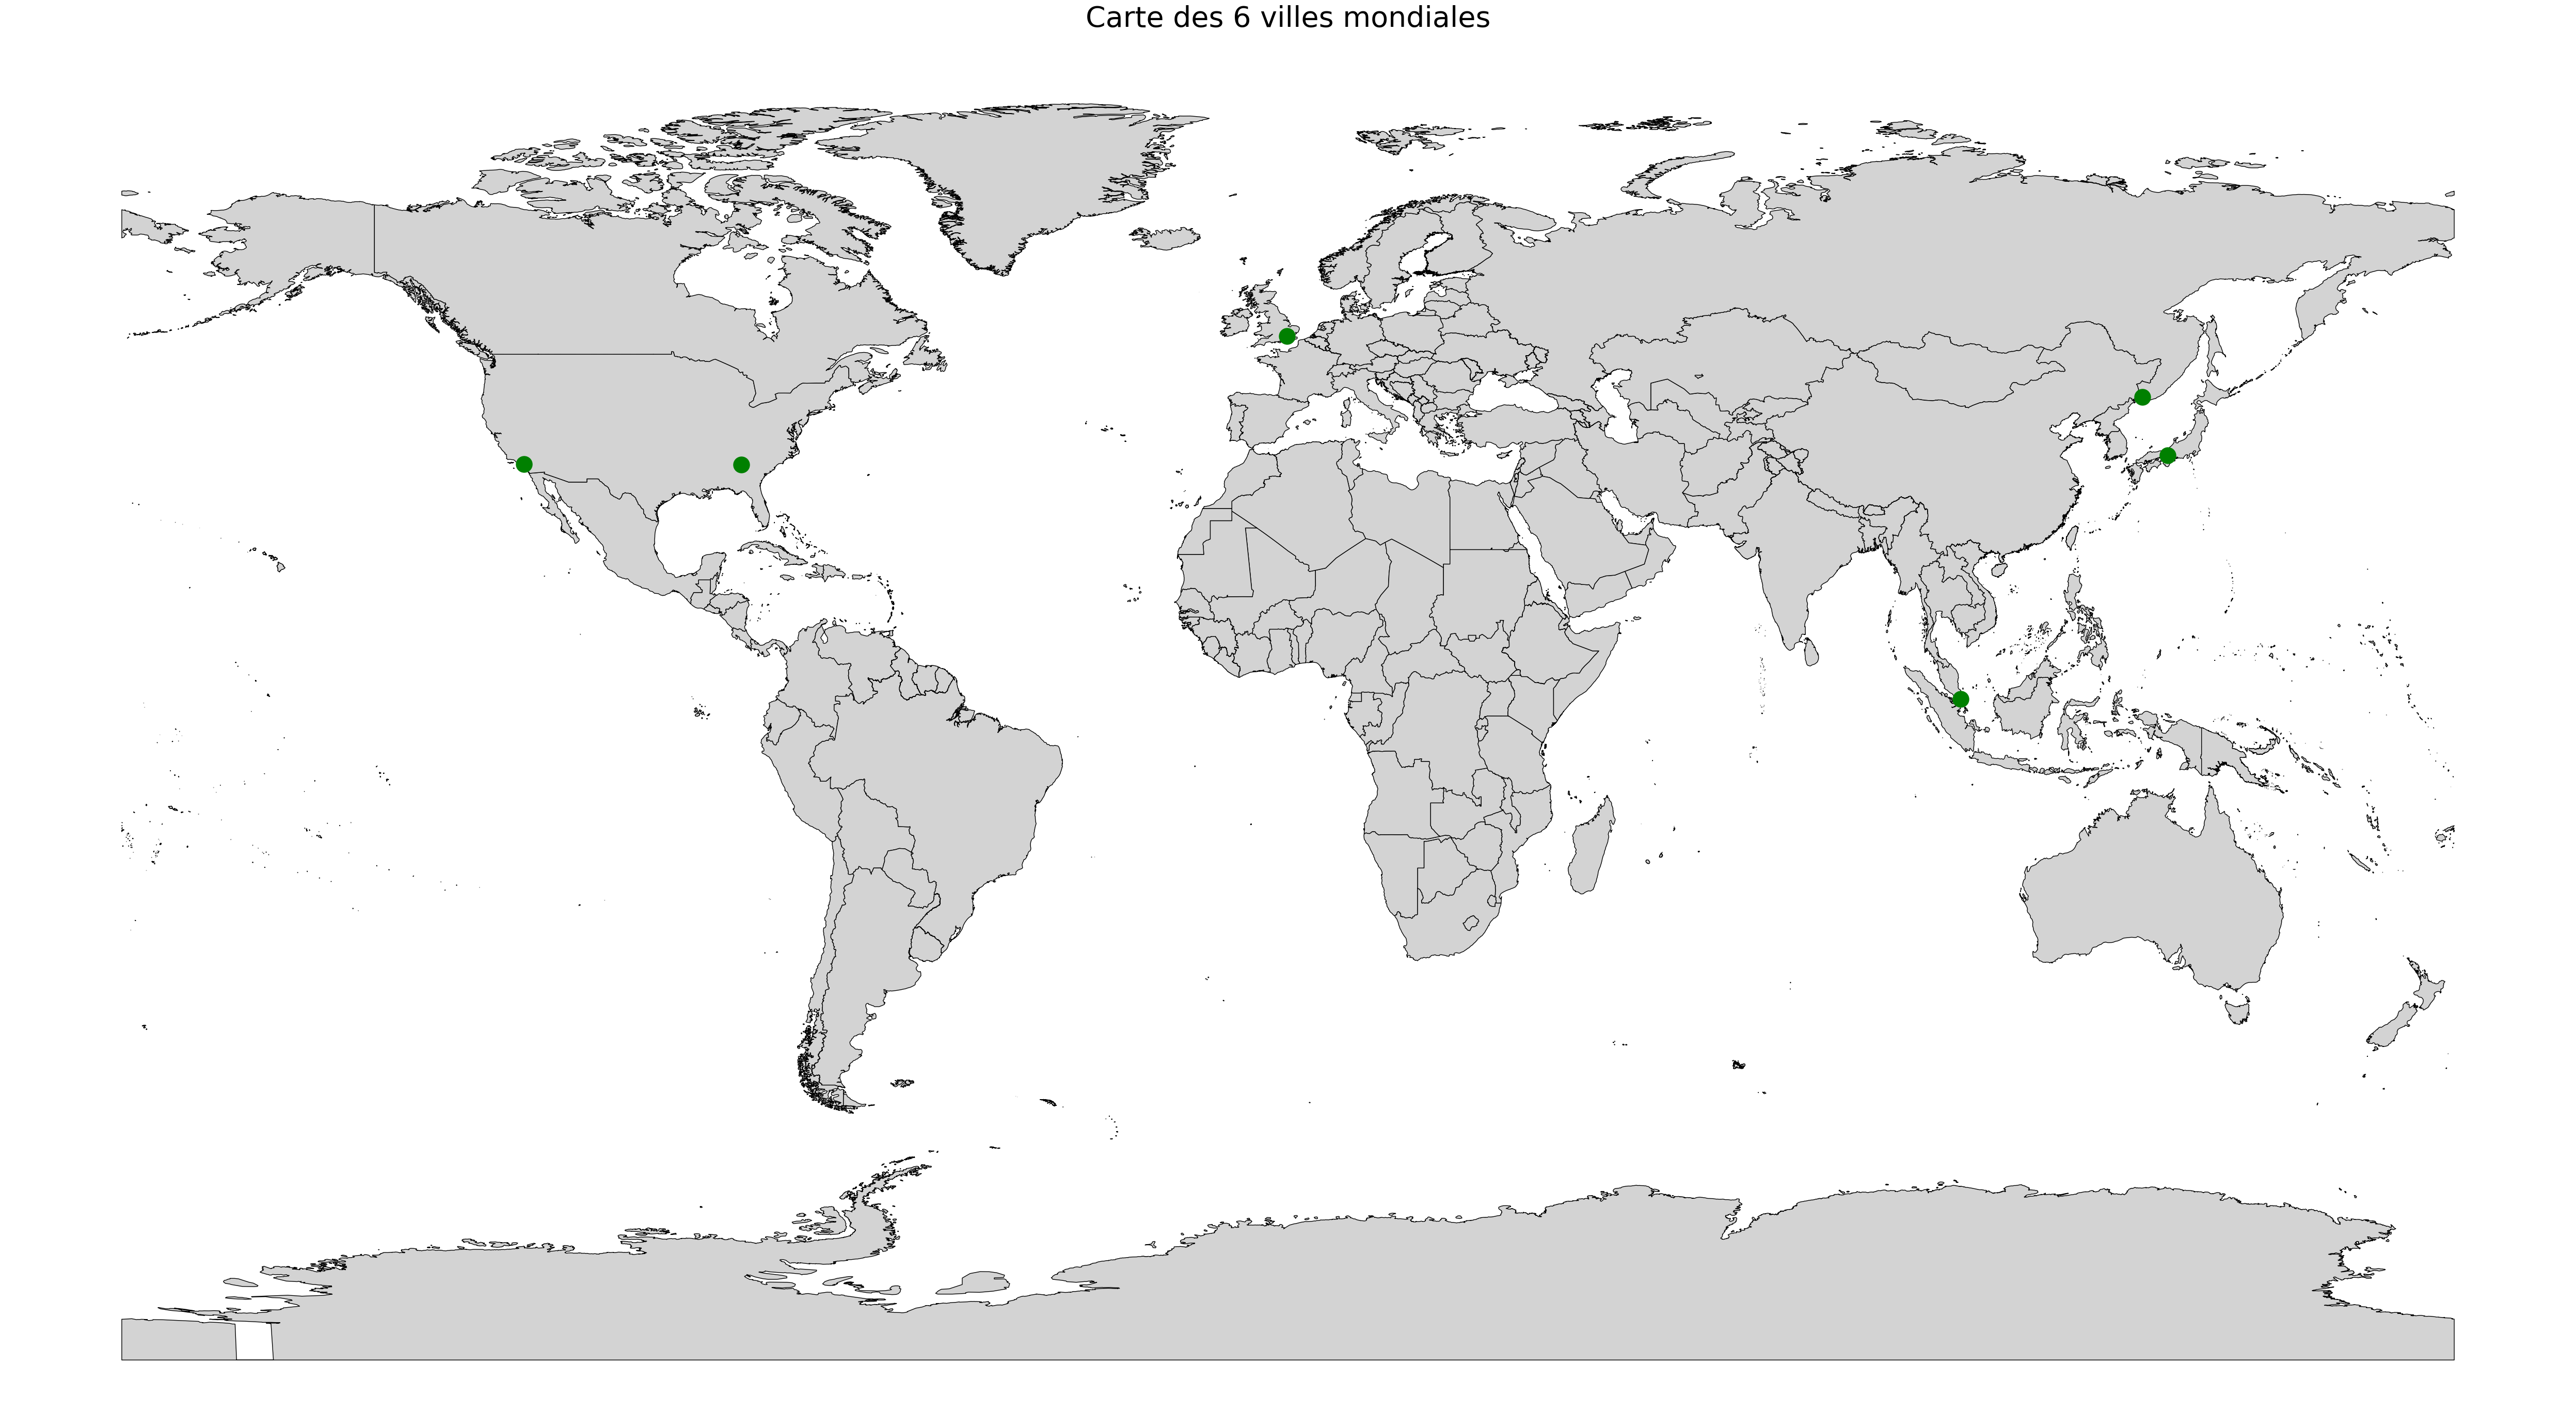

In [23]:
# Version claude ia 

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Coordonnées géographiques des 6 villes (longitude, latitude)
villes = {
    'Londres': (-0.1276, 51.5074),
    'Atlanta': (-84.3880, 33.7490),
    'Singapour': (103.8198, 1.3521),
    'Vladivostok': (131.8869, 43.1150),
    'Anaheim': (-117.9145, 33.8366),
    'Kyoto': (135.7681, 35.0116)
} #→ pareil qu'au dessus 

# Création d'un GeoDataFrame avec les points des villes
geometry = [Point(lon, lat) for lon, lat in villes.values()] # → idem, on a pas vu
gdf_villes = gpd.GeoDataFrame(
    {'ville': list(villes.keys())}, # → Bon déjà c'est vraiment débile de faire comme ça, mais on l'a pas vu non plus 
    geometry=geometry,
    crs='EPSG:4326'  # WGS84
)

# Chargement du fichier GeoJSON des contours du monde
world = gpd.read_file('DATA/World_Countries_Boundaries.geojson')

# Projection en WGS84 si nécessaire
if world.crs != 'EPSG:4326':          # → On l'a pas vu
    world = world.to_crs('EPSG:4326')

# Création de la figure
fig, ax = plt.subplots(figsize=(50, 30))

# Tracé des contours du monde
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Tracé des points des villes
gdf_villes.plot(ax=ax, color='green', markersize=500)

# Suppression des axes
ax.set_axis_off()

# Ajout d'un titre
plt.title('Carte des 6 villes mondiales', fontsize=40, pad=20) # → on a pas vu 

# Sauvegarde de la figure
plt.tight_layout()
#plt.savefig('carte_6_villes.png', dpi=100, bbox_inches='tight')  # → on a pas vu
plt.show()

# Rendu attendu :

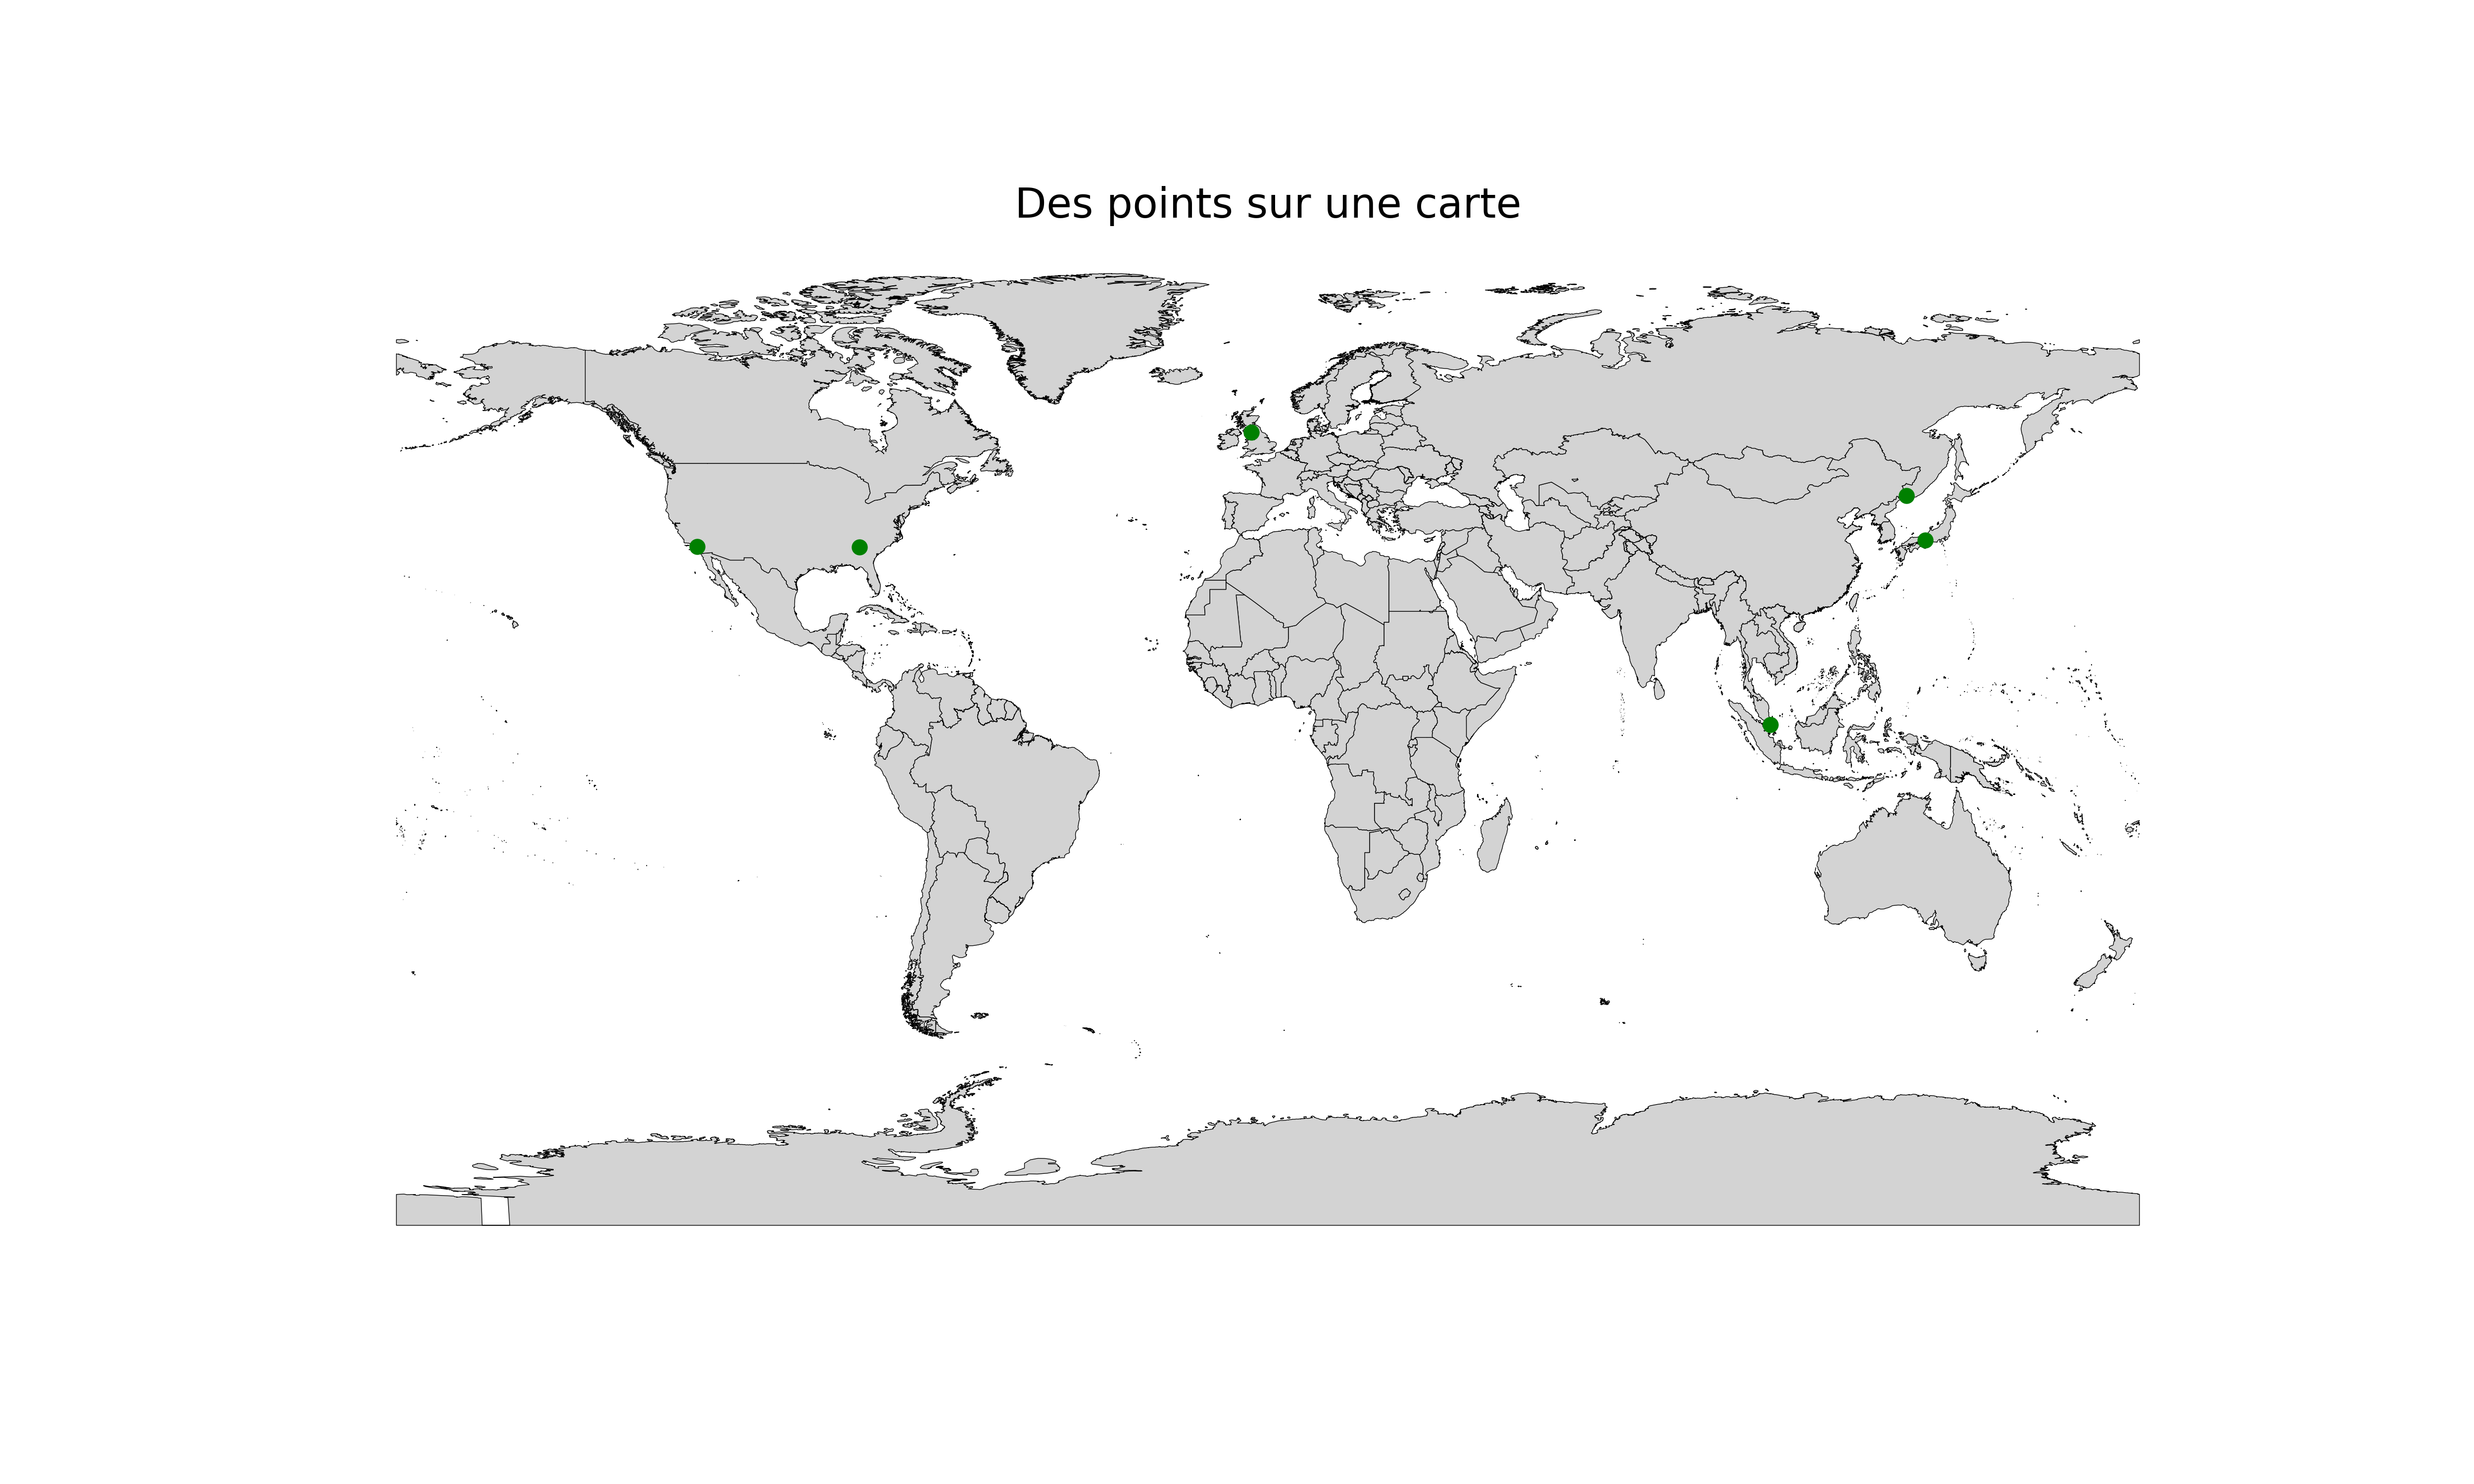

In [3]:
from IPython.display import Image
Image(filename='DATA/exo1.png') 